In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [711]:
country_data=pd.read_csv("Country-data (1).csv",encoding='utf-8',engine='python')

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [712]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [713]:
len(list(country_data['country'].unique()))

167

No missing values, hence we can proceed with our next step for data analysis



In [714]:
country_data.set_index('country',inplace=True)
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [715]:
country_data['health']=(country_data['health']*country_data['gdpp'])/100
country_data['imports']=(country_data['imports']*country_data['gdpp'])/100
country_data['exports']=(country_data['exports']*country_data['gdpp'])/100

country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [716]:
country_data.shape

(167, 9)

# univariate and bivariate analysis 

In [717]:
country_data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [718]:
col = list(country_data.columns)
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

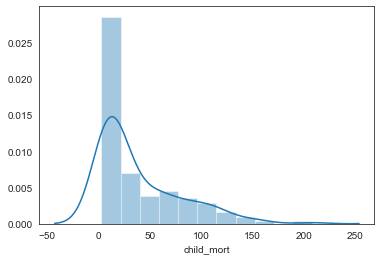

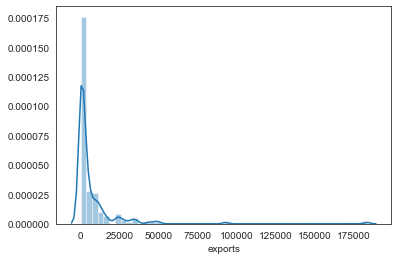

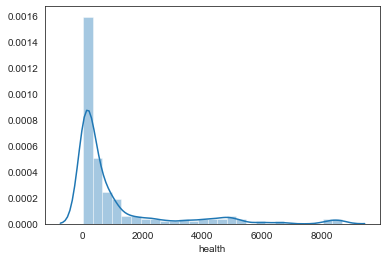

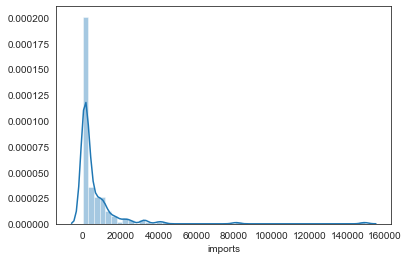

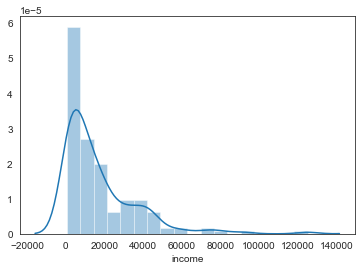

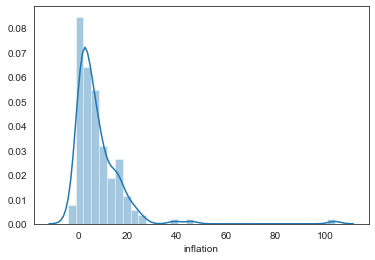

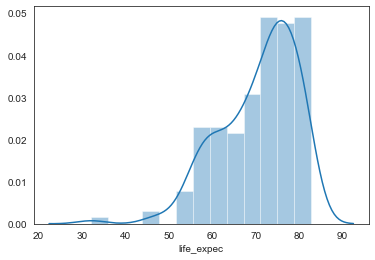

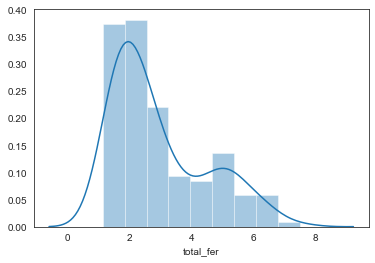

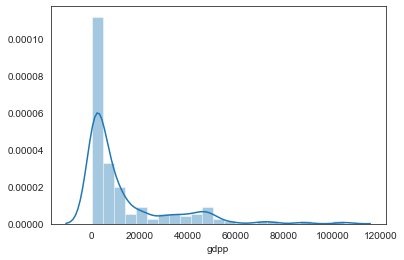

In [719]:
for c in col:
    sns.distplot(country_data[c])
    plt.show();

In [720]:
country_data[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


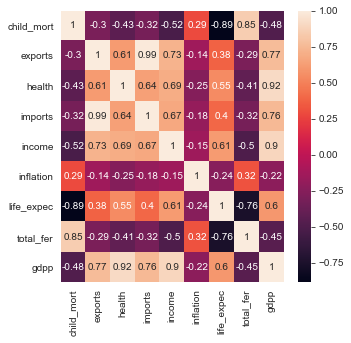

In [721]:
plt.figure(figsize=(5,5))
sns.heatmap(country_data[col].corr(), annot=True);

# Outlier

In [722]:
q1 = country_data['health'].quantile(0.01)
q2 = country_data['gdpp'].quantile(0.99)
print(q1," ",q2)

17.009362   79088.00000000004


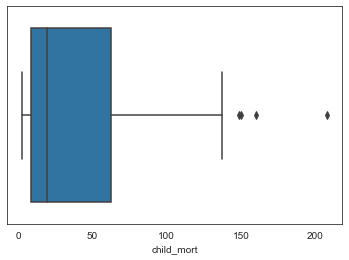

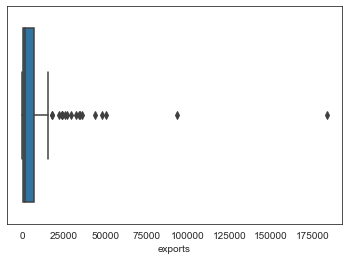

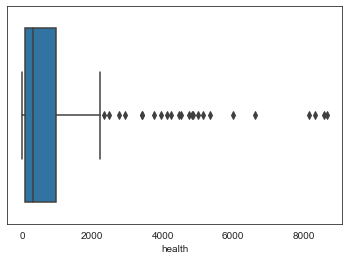

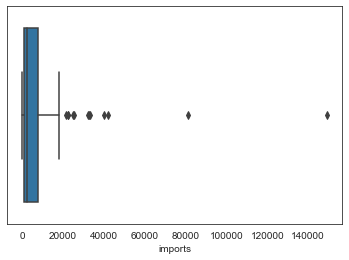

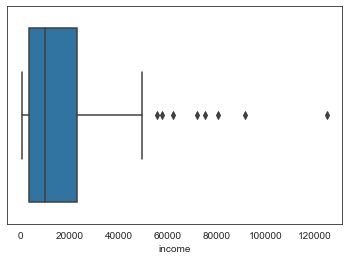

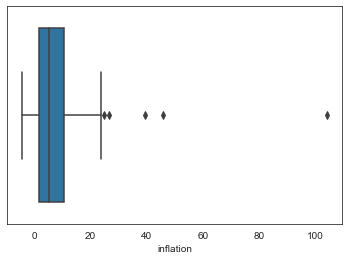

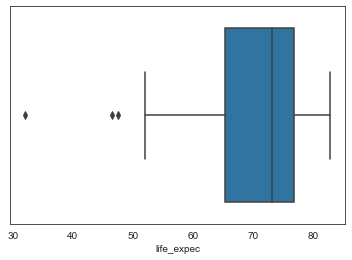

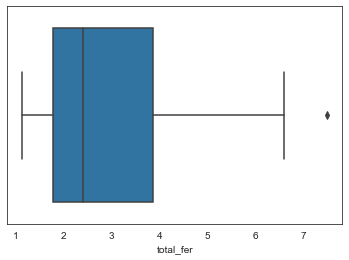

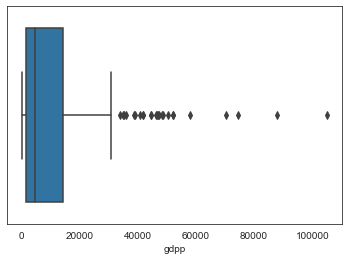

In [723]:
for c in col:
    sns.boxplot(country_data[c])
    plt.show();

Hopkins test

In [724]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [725]:
hopkins(country_data.drop('gdpp', axis=1))

0.9763968217097554

In [726]:
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200



# Scaling the dataset with Standard Scaler 


In [727]:
from  sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_data)
df1=pd.DataFrame(df1,columns=country_data.columns)

df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [728]:
df1.shape

(167, 9)

In [729]:
type(df1)

pandas.core.frame.DataFrame

In [730]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [731]:
df1 = pd.DataFrame(df1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [732]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [733]:
df1.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [734]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [735]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [736]:
df1.columns = col

In [737]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Silhoutte Score


In [738]:

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append( [k, silhouette_score(df1, kmean.labels_)] )

In [739]:
ss

[[2, 0.45863306035476264],
 [3, 0.4218615812599681],
 [4, 0.42673357397704514],
 [5, 0.43077513396770467],
 [6, 0.33609983813589606],
 [7, 0.3094054909508284],
 [8, 0.3220272610230326],
 [9, 0.30932874574213826],
 [10, 0.2979658104477083]]

In [740]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.458633
1,3,0.421862
2,4,0.426734
3,5,0.430775
4,6,0.336100
5,7,0.309405
6,8,0.322027
7,9,0.309329
8,10,0.297966


In [741]:
sil.columns = ['k','Silhoutte Score']

In [742]:
sil

,k,Silhoutte Score
0,2,0.458633
1,3,0.421862
2,4,0.426734
3,5,0.430775
4,6,0.336100
5,7,0.309405
6,8,0.322027
7,9,0.309329
8,10,0.297966


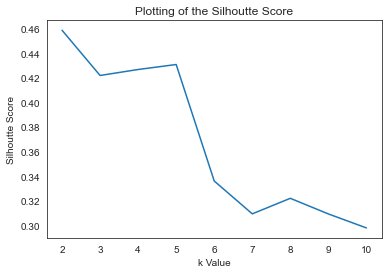

In [743]:
plt.plot(sil['k'], sil['Silhoutte Score'])
plt.xlabel("k Value")
plt.ylabel("Silhoutte Score")
plt.title("Plotting of the Silhoutte Score")
plt.show();

In [744]:
# SSD Elbow

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append( [k, kmean.inertia_] )

In [745]:
ssd

[[2, 942.2066009265523],
 [3, 651.3820515830138],
 [4, 481.25516244976285],
 [5, 401.99973077612157],
 [6, 345.9514237347252],
 [7, 301.9984922134564],
 [8, 273.0143573730995],
 [9, 242.09032346950673],
 [10, 219.16666780880325]]

In [746]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,942.206601
1,3,651.382052
2,4,481.255162
3,5,401.999731
4,6,345.951424
5,7,301.998492
6,8,273.014357
7,9,242.090323
8,10,219.166668


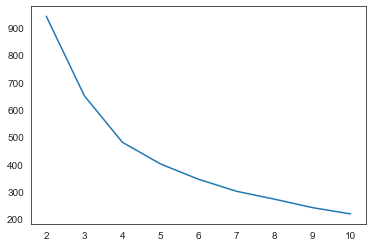

In [747]:
plt.plot(ssd[0], ssd[1]);


K-Means

In [748]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [749]:
print(kmeans.cluster_centers_)

[[ 1.32661038 -0.36504233 -0.52444743 -0.39281661 -0.68923797  0.39181237
  -1.27627565  1.3543418  -0.60496339]
 [-0.82629395  1.31794823  1.82094465  1.3111162   1.71870094 -0.45233422
   1.12317044 -0.78661849  1.92353171]
 [-0.44550624 -0.21297273 -0.28365905 -0.1962204  -0.16527697 -0.0674905
   0.32760944 -0.47234163 -0.27275434]]


In [750]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [751]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [752]:
df1['labels'] = kmeans.labels_

In [753]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2


In [754]:
df1['labels'].value_counts()

2    91
0    48
1    28
Name: labels, dtype: int64

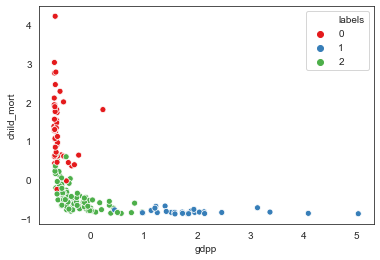

In [755]:
sns.scatterplot(x='gdpp', y='child_mort',hue='labels', data=df1, palette='Set1');

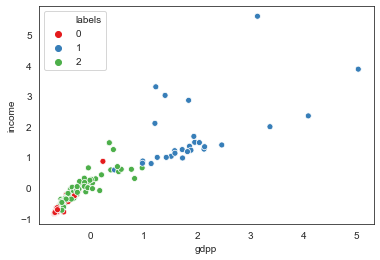

In [756]:
sns.scatterplot(x='gdpp', y='income',hue='labels', data=df1, palette='Set1');

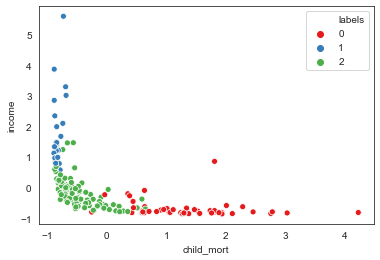

In [757]:
sns.scatterplot(x='child_mort', y='income',hue='labels', data=df1, palette='Set1');

# Cluster profiling: gdpp, child_mort and income

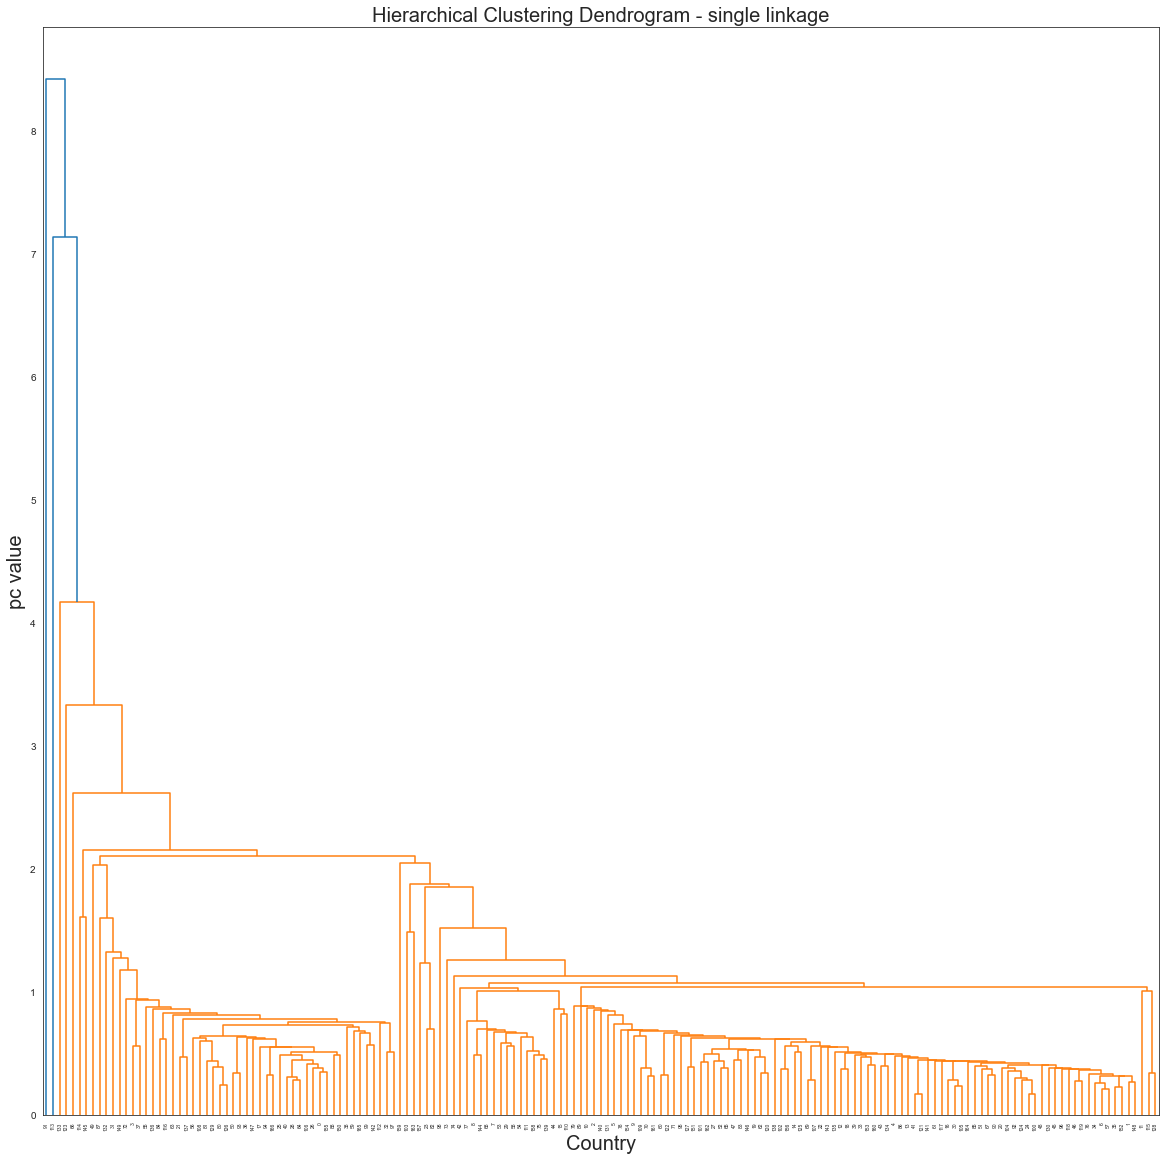

In [759]:
plt.figure(figsize=(20,20))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

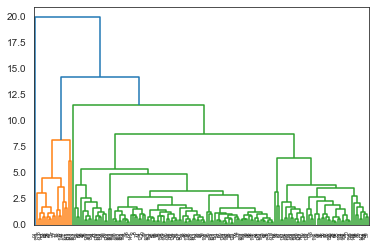

In [760]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [763]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [764]:
df1['cluster_labels'] = cluster_labels
df1.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,0
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,0
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2,0


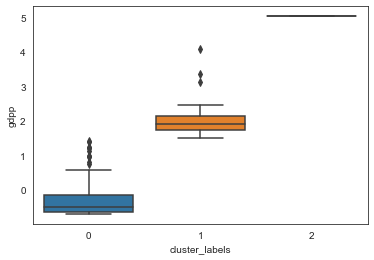

In [765]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df1);


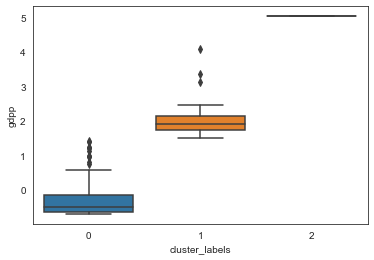

In [766]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df1);

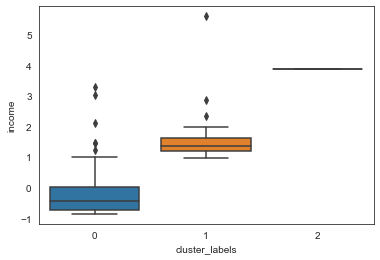

In [767]:
sns.boxplot(x='cluster_labels', y='income', data=df1);

In [768]:
df1['Cluster_label']=cluster_labels

df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels,Cluster_label
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,0,0
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2,0,0
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2,0,0
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,0,0
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2,0,0
